<a href="https://colab.research.google.com/github/dabiyyu/clustering-iceland/blob/main/clustering_iceland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

sns.set(rc={'figure.figsize':(15,9)})

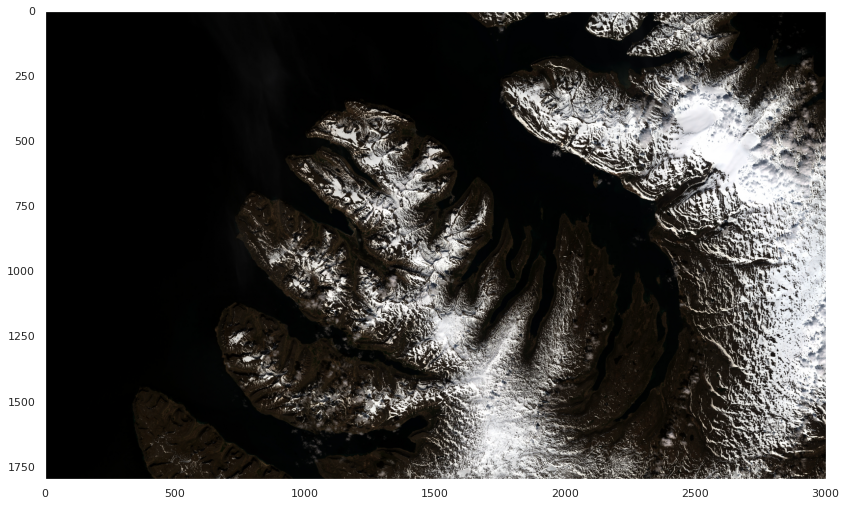

In [3]:
iceland = img.imread('432c.jpg')

plt.figure(figsize = (14,18))
plt.grid(None)

plt.imshow(iceland);

In [4]:
iceland.shape

(1801, 3002, 3)

In [6]:
from tqdm.auto import tqdm

r = []
g = []
b = []

for row in tqdm(iceland):
    for pixel in row:
        
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [7]:
pixels = pd.DataFrame({'Red': r, 'Green': g, 'Blue':b})
pixels

,Red,Green,Blue
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
5406597,29,24,18
5406598,66,57,52
5406599,90,81,74
5406600,51,43,32


In [8]:
from scipy.cluster.vq import whiten

scaled = pd.DataFrame(whiten(pixels), columns=pixels.columns)
scaled

,Red,Green,Blue
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
5406597,0.368159,0.304499,0.227441
5406598,0.837880,0.723184,0.657051
5406599,1.142564,1.027683,0.935034
5406600,0.647453,0.545560,0.404339


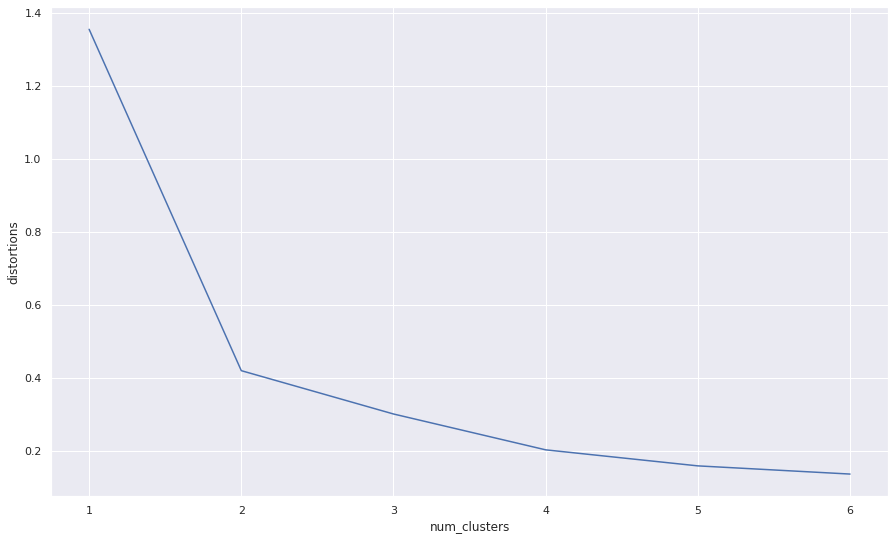

In [9]:
from scipy.cluster.vq import kmeans, vq

distortions = []
num_clusters = range(1, 7)

for i in tqdm(num_clusters):
    cluster_centers, distortion = kmeans(scaled, i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.rcParams['figure.figsize']=(15,9)
plt.show()

In [10]:
cluster_centers, distortion = kmeans(scaled, 4)

cluster_labels, distortions = vq(scaled, cluster_centers)

In [11]:
clus_img = cluster_labels.reshape(1801, 3002)

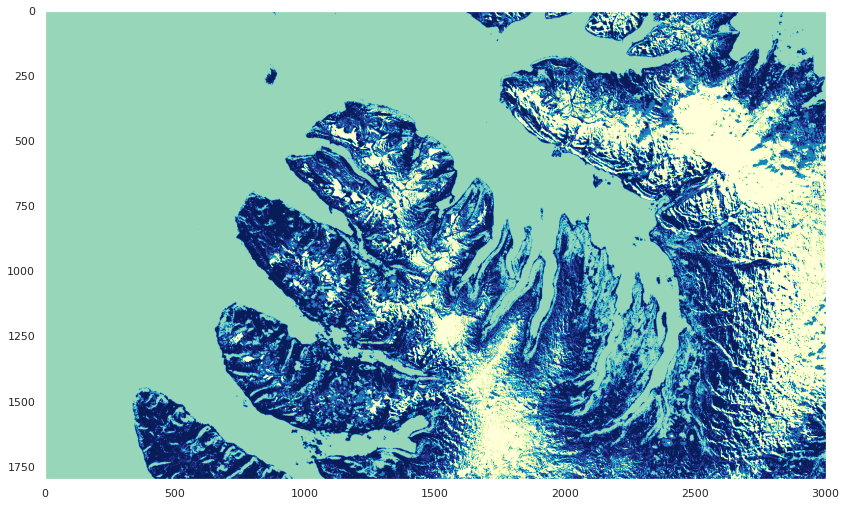

In [12]:
plt.figure(figsize = (14,18))
plt.grid(None)

plt.imshow(clus_img, cmap='YlGnBu')
plt.show()

compared to the land/water band combination for Landsat 8, the results are quite good. especially on the boundary between land and sea.

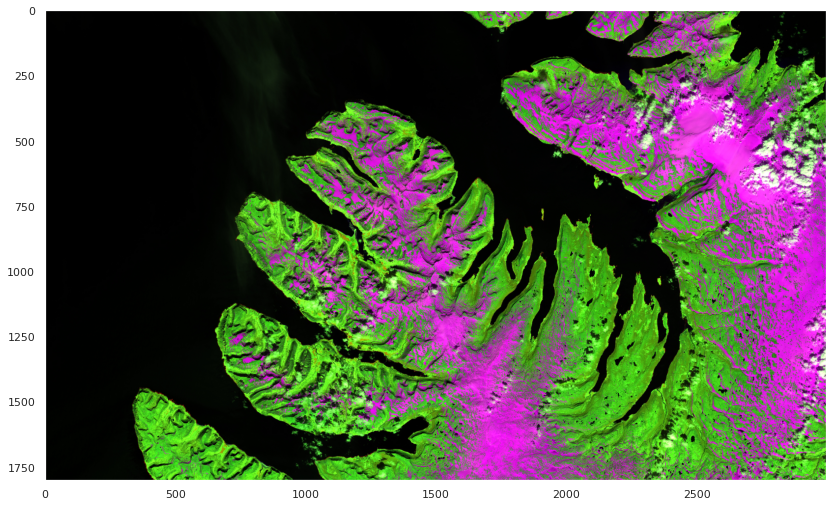

In [13]:
iceland_lw = img.imread('564c.jpg')

plt.figure(figsize = (14,18))
plt.grid(None)

plt.imshow(iceland_lw);